<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualize-Apple-Health-Data" data-toc-modified-id="Visualize-Apple-Health-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visualize Apple Health Data</a></span></li><li><span><a href="#Configure-environment" data-toc-modified-id="Configure-environment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Configure environment</a></span></li><li><span><a href="#Import-and-restructure-data" data-toc-modified-id="Import-and-restructure-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import and restructure data</a></span></li><li><span><a href="#Plot-heart-rate-data" data-toc-modified-id="Plot-heart-rate-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot heart rate data</a></span></li><li><span><a href="#HeartRateVariabilitySDNN" data-toc-modified-id="HeartRateVariabilitySDNN-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>HeartRateVariabilitySDNN</a></span></li><li><span><a href="#SleepAnalysis" data-toc-modified-id="SleepAnalysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>SleepAnalysis</a></span></li><li><span><a href="#Experiment-with-Bokeh" data-toc-modified-id="Experiment-with-Bokeh-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Experiment with Bokeh</a></span></li></ul></div>

## Visualize Apple Health Data

The purpose of this notebook is to visualize health data that has been imported from an Apple iPhone through iOS.
This notebook serves as an exploratory environment, and the project may expand to become a more fully-realized Health Dashboard. This may take the shape of an HTML document, web app, or possibly a bokeh-driven tool.

## Configure environment

In [1]:
import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import qgrid
import sys

from datetime import timezone
from IPython import display
from glob import glob

sys.path.append('/Users/jonstelman/data_projects/')
from tools.helpers import print_json
%load_ext autoreload
%autoreload 2
%matplotlib inline
qgrid.enable()

print('Last run:  {}'.format(
       datetime.datetime.now() \
      .strftime('%b %d, %Y, %H:%M')))

Last run:  Oct 28, 2018, 18:48


In [2]:
from tools.styles import css_style
css_style('dark')  # 'light' or 'dark'

## Import and restructure data

In [3]:
data_files = glob('/Users/jonstelman/data_projects/apple_health/data/*.csv')


cols = ['type', 'creationDate', 'startDate', 'endDate', 'value', 'unit']

sets = []
for f in data_files:
    set = f.split('/')[-1].split('.')[0]
    sets.append(set)
#print(sets)

dfs = []
for f in data_files:
    dfs.append(pd.read_csv(f))

for i, df in enumerate(dfs):
    print('{:2} {:25} - {:6} rows'.format(i, sets[i], len(df)))

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


 0 MindfulSession            -      3 rows
 1 HeartRate                 -  40281 rows
 2 BodyMass                  -      1 rows
 3 StepCount                 - 156486 rows
 4 DistanceWalkingRunning    - 172044 rows
 5 RestingHeartRate          -    208 rows
 6 Height                    -      1 rows
 7 HeartRateVariabilitySDNN  -    246 rows
 8 AppleExerciseTime         -   8173 rows
 9 BasalEnergyBurned         -  35743 rows
10 AppleStandHour            -   3340 rows
11 WalkingHeartRateAverage   -    135 rows
12 ActiveEnergyBurned        - 202508 rows
13 FlightsClimbed            -   4456 rows
14 SleepAnalysis             -    104 rows


## Plot heart rate data

In [4]:
hr = dfs[1]
hr = hr.copy()[cols]

hr['startDate'] = pd.to_datetime(hr.startDate)
hr['endDate'] = pd.to_datetime(hr.endDate)
hr['creationDate'] = pd.to_datetime(hr.creationDate)
hr.head(10)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True, 'boldIndex': True}, id='333a1eef-4f00-4db7-ad84-1ff4098eafcb', precision=5)

In [5]:
def localize(dt_object, tz='US/Pacific'):
    pst_time = dt_object.replace(tzinfo=timezone.utc)\
             .astimezone(tz=tz)
    return pst_time

hr['time_pst'] = hr.startDate.apply(lambda t: localize(t))
hr['time_est'] = hr.startDate.apply(lambda t: localize(t, tz='US/Eastern'))

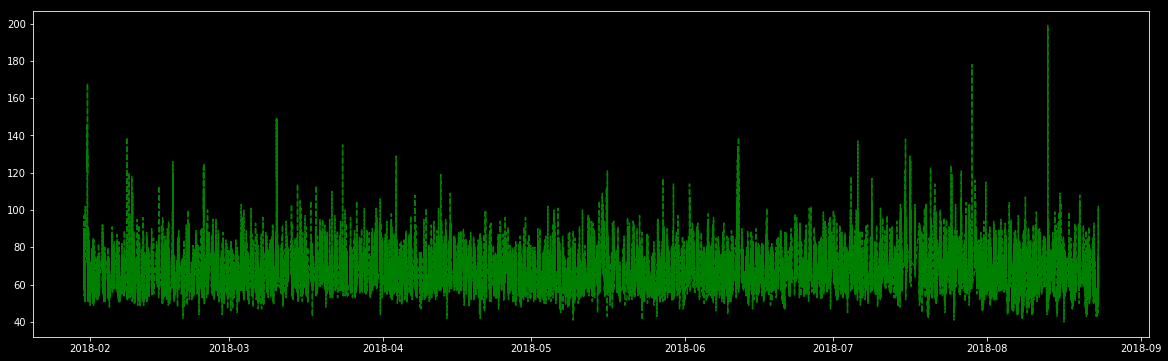

In [6]:
plt.figure(figsize=(20,6))
plt.plot(hr.time_pst, hr.value, 'g--');

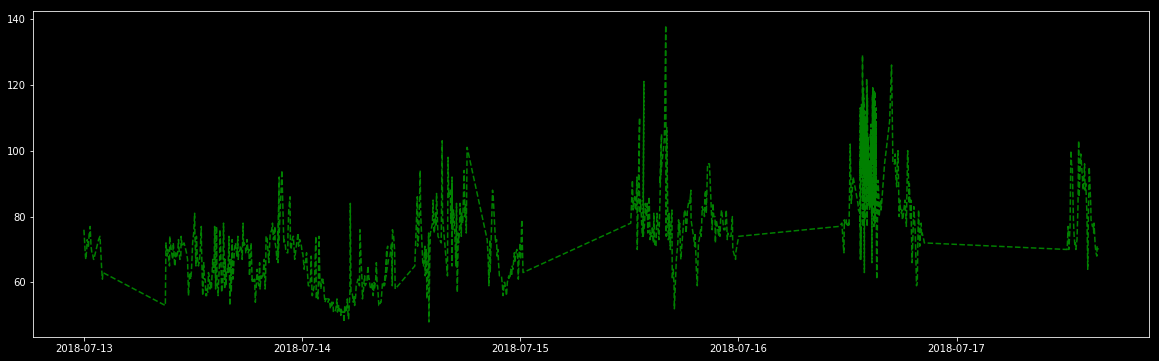

In [7]:
# Me in NY
hr_ = hr[(hr.time_est>'2018-07-13')&(hr.time_est<'2018-07-18')]

plt.figure(figsize=(20,6))
plt.plot(hr_.time_est, hr_.value, 'g--');

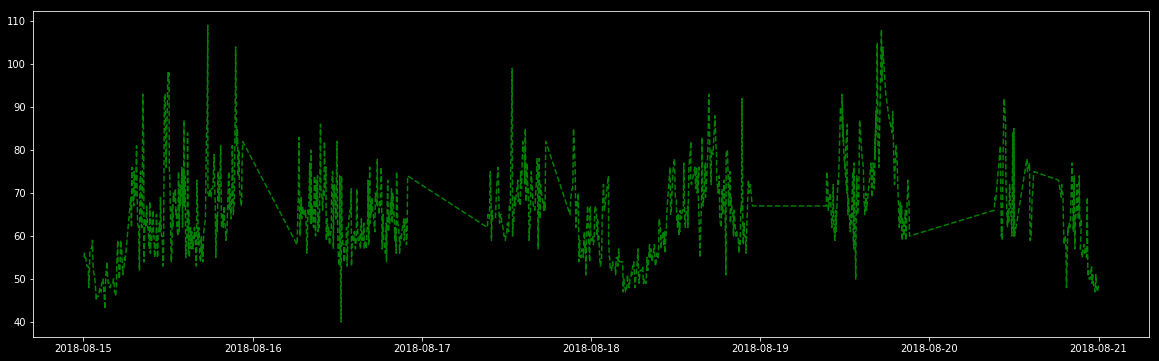

In [8]:
# Tammy in Portland
hr_ = hr[(hr.time_pst>'2018-08-15')&(hr.time_pst<'2018-08-21')]
plt.figure(figsize=(20,6))
plt.plot(hr_.time_pst, hr_.value, 'g--');

## HeartRateVariabilitySDNN

In [9]:
hrv = dfs[7]
hrv = hrv.copy()[cols]
hrv['startDate'] = pd.to_datetime(hrv.startDate)
hrv['endDate'] = pd.to_datetime(hrv.endDate)
hrv['creationDate'] = pd.to_datetime(hrv.creationDate)

hrv['time_pst'] = hrv.startDate.apply(lambda t: localize(t))
hrv['time_est'] = hrv.startDate.apply(lambda t: localize(t, tz='US/Eastern'))

hrv.head(10)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True, 'boldIndex': True}, id='bcfccd4a-c4c1-4af8-baa5-ad7320d06e63', precision=5)

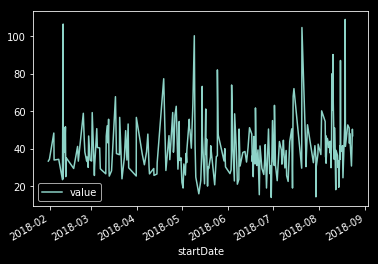

In [10]:
hrv.plot(x='startDate', y='value');

## SleepAnalysis

In [11]:
sa = dfs[14]

sa = sa.copy()[cols].drop('unit', axis=1)
sa['startDate'] = pd.to_datetime(sa.startDate)
sa['endDate'] = pd.to_datetime(sa.endDate)
sa['creationDate'] = pd.to_datetime(sa.creationDate)


sa['time_pst'] = sa.startDate.apply(lambda t: localize(t))
sa['time_est'] = sa.startDate.apply(lambda t: localize(t, tz='US/Eastern'))

sa.head()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True, 'boldIndex': True}, id='07ba5659-01f4-4077-a8d5-285fc5c7f376', precision=5)

In [12]:
sa.value.unique()

array(['HKCategoryValueSleepAnalysisInBed',
       'HKCategoryValueSleepAnalysisAsleep'], dtype=object)

Classifier labels - `"isInBed"`, `"isAsleep"`, but nothing like `"isAwake"`...  
  
Need to think about how to make a useful story from this... can it be combined with another dataset to determine wake time?

## Experiment with Bokeh

In [13]:
import warnings
warnings.filterwarnings('ignore')

d = hr[['creationDate', 'value']]
d['creationDate'] = pd.to_datetime(d.creationDate).copy()

d['time_pst'] = d.creationDate.apply(lambda t: localize(t))
d['time_est'] = d.creationDate.apply(lambda t: localize(t, tz='US/Eastern'))

d['hour'] = d.time_pst.apply(lambda d: d.hour)
d['month'] = d.time_pst.apply(lambda d: d.month)
d['year'] = d.time_pst.apply(lambda d: d.year)




dg = d.groupby(['year', 'month', 'hour']).mean().reset_index()
dg = dg.set_index('month')

In [14]:
from math import pi
from bokeh.io import show
from bokeh.models import LinearColorMapper, BasicTicker, PrintfTickFormatter, ColorBar
from bokeh.plotting import figure

# reshape to 1D array or rates with a month and year for each row.

months = [str(m) for m in sorted(dg.index.unique())]
hours = [str(h) for h in sorted(dg.hour.unique())]

# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", 
          "#e2e2e2", "#dfccce", "#ddb7b1", 
          "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, 
                           low=dg.value.min(), 
                           high=dg.value.max())

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

p = figure(title="Heart Rate by Hour",
           x_range=months, 
           y_range=hours,
           x_axis_location="above", 
           plot_width=900, 
           plot_height=400,
           tools=TOOLS, toolbar_location='below',
           tooltips=[('hour', '@hour @month'), ('mean heart rate', '@value')]
          )

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
#p.xaxis.major_label_orientation = pi / 3

p.rect(x="month", y="hour", width=1, height=1,
       source=dg,
       fill_color={'field': 'value', 'transform': mapper},
       line_color=None)

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     #formatter=PrintfTickFormatter(format="%d%%"),
                     label_standoff=6, border_line_color=None, location=(0, 0))
p.add_layout(color_bar, 'right')

show(p)